In [1]:
from brian2 import *
from scipy import stats

In [13]:
def model(a_p = 0.02, b_p = 0.2, c_p = -65, d_p = 8, I_p = 15, neurons = 1, duration = 100*ms):
    start_scope()

    b = b_p/ms
    c = c_p * mV
    I = I_p*mV/ms


    #Neuronal equations of the Izhikevich-neuron
    eqs = '''
    dv/dt = (0.04/ms/mV)*v**2+(5/ms)*v+140*mV/ms-u+I : volt
    du/dt = a*(b*v-u)                                : volt/second
    a                                                : 1/second
    d                                                : volt/second
    '''


    reset = '''
    v = c
    u = u + d
    '''


    #Set up neuron population
    G = NeuronGroup(neurons,eqs,threshold='v >= 30*mV',reset=reset,method='euler')
    G.a = a_p/ms
    G.d = d_p*mV/ms
    G.v = c
    G.u = b * c


    M = StateMonitor(G,'v', record=True)


    run(duration)
    
    return M

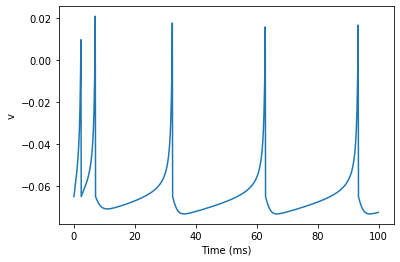

In [20]:
M = model()

figure
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

show()